In [42]:
# Importing necessary libraries
import pickle  # For loading the trained model
import numpy as np  # For generating synthetic data
import pandas as pd  # For data manipulation
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.metrics import r2_score  # For evaluating model performance
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For advanced plots

# Why:
# These libraries are essential for data handling, prediction, evaluation, and visualization.


 Load the trained model
 
 Purpose:
 - The trained model is used to predict crime rates based on historical data.
 - This is the backbone of the analysis as it generates predictions for the synthetic dataset.

1. What: The cell below cell generates synthetic data for testing the model. Each row represents a hypothetical record of crime statistics for a city in a given year.
2. Why: Since we don't have real-world data, synthetic data allows us to evaluate the model's predictions.
3. How: Random values are generated within realistic ranges for features like population and crime types.

In [43]:


# Load the trained model (replace 'model.pkl' with the actual path to your model file)
with open('Model/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Function to generate synthetic data for prediction
def generate_synthetic_data(num_samples=5):
    # Cities under consideration
    cities = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Mumbai']
    
    # Generate synthetic rows of data
    data = []
    for _ in range(num_samples):
        year = np.random.randint(2014, 2022)
        city = np.random.choice(cities)
        population = round(np.random.uniform(50, 100), 2)
        murder = np.random.randint(50, 200)
        kidnapping = np.random.randint(100, 500)
        crime_women = np.random.randint(500, 2000)
        crime_children = np.random.randint(200, 1000)
        crime_juveniles = np.random.randint(100, 500)
        crime_senior = np.random.randint(50, 300)
        crime_sc = np.random.randint(5, 150)
        crime_st = np.random.randint(0, 50)
        econ_offenses = np.random.randint(100, 1000)
        cyber_crimes = np.random.randint(20, 1000)

        # Combine into a dictionary (row)
        row = {
            'Year': year,
            'City': city,
            'Population (in Lakhs) (2011)+': population,
            'Murder': murder,
            'Kidnapping': kidnapping,
            'Crime against women': crime_women,
            'Crime against children': crime_children,
            'Crime Committed by Juveniles': crime_juveniles,
            'Crime against Senior Citizen': crime_senior,
            'Crime against SC': crime_sc,
            'Crime against ST': crime_st,
            'Economic Offences': econ_offenses,
            'Cyber Crimes': cyber_crimes
        }
        data.append(row)
    
    return pd.DataFrame(data)

# Generate new synthetic data (e.g., 5 rows of data)
# This data simulates real-world crime data for predictions.
new_synthetic_data = generate_synthetic_data(num_samples=5)

# Display the generated synthetic data
# This helps verify the data generation process.
print("Generated Synthetic Data:\n", new_synthetic_data)


Generated Synthetic Data:
    Year       City  Population (in Lakhs) (2011)+  Murder  Kidnapping  \
0  2018  Bengaluru                          86.31     136         261   
1  2016      Delhi                          91.18     176         360   
2  2017     Mumbai                          53.66      97         286   
3  2019      Delhi                          72.24     112         191   
4  2017      Delhi                          52.37     115         325   

   Crime against women  Crime against children  Crime Committed by Juveniles  \
0                  937                     520                           103   
1                 1677                     282                           345   
2                 1537                     685                           448   
3                 1517                     736                           116   
4                 1236                     529                           416   

   Crime against Senior Citizen  Crime against SC  Cr

In [44]:

# Preprocessing: Convert the categorical column 'City' to numeric using Label Encoding
label_encoder = LabelEncoder()
new_synthetic_data['City'] = label_encoder.fit_transform(new_synthetic_data['City'])




 Why:
 - Machine learning models require numeric inputs for processing.
 - 'City' is a categorical feature, so it is encoded into numeric values using LabelEncoder.



In [45]:
# Extract only the first 4 features (same as the training data)
x_input = new_synthetic_data[['Year', 'City', 'Population (in Lakhs) (2011)+', 'Murder']].values

# Make predictions using the trained model
predictions = model.predict(x_input)

# Print the predictions
print("\nPredictions for the Synthetic Data:", predictions)

# Evaluate the model's performance on the synthetic data using a suitable metric (e.g., MSE or R2)
# For demonstration, we'll use R2 score (if it's a regression model).


Predictions for the Synthetic Data: [2.03196066 2.14355646 1.70148222 1.64764224 1.84944827]


 Why:
 - This step predicts crime rates for each record in the synthetic dataset.
 - Predictions help in understanding potential crime severity in different regions and years.

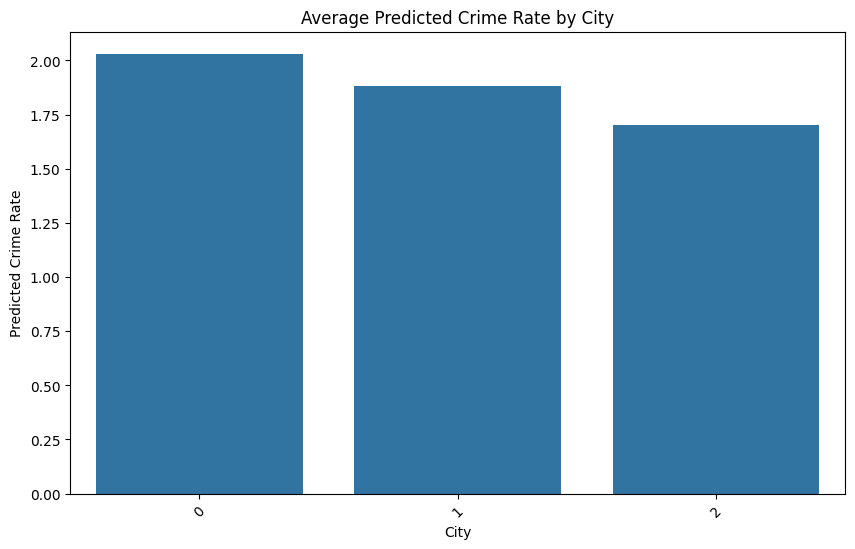

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city to calculate average predicted crime rate
new_synthetic_data['Predicted Crime Rate'] = predictions
avg_crime_by_city = new_synthetic_data.groupby('City')['Predicted Crime Rate'].mean().reset_index()

# Visualization: Heatmap or Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Predicted Crime Rate', data=avg_crime_by_city)
plt.title('Average Predicted Crime Rate by City')
plt.xticks(rotation=45)
plt.ylabel('Predicted Crime Rate')
plt.xlabel('City')
plt.show()


 Why:
- A bar plot allows us to compare the predicted crime rates across different cities.
 Insight:
 - Cities with higher crime rates require targeted interventions, such as enhanced policing.

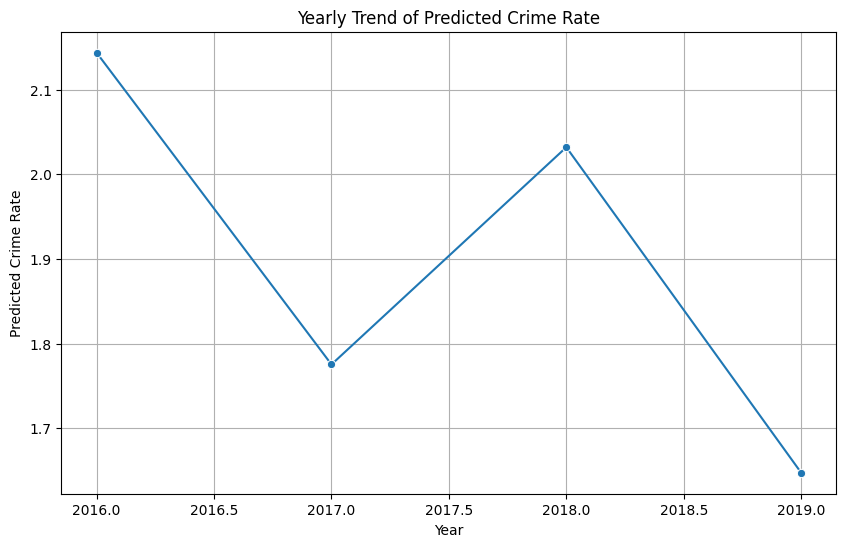

In [47]:
# Temporal Trend Analysis
avg_crime_by_year = new_synthetic_data.groupby('Year')['Predicted Crime Rate'].mean().reset_index()

# Visualization: Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Predicted Crime Rate', data=avg_crime_by_year, marker='o')
plt.title('Yearly Trend of Predicted Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.xlabel('Year')
plt.grid(True)
plt.show()


Why:
 - A line plot highlights temporal trends, showing whether crime rates are increasing, decreasing, or stable.
 
 Insight:
 - Spikes in certain years might indicate socio-political or economic changes affecting crime rates.


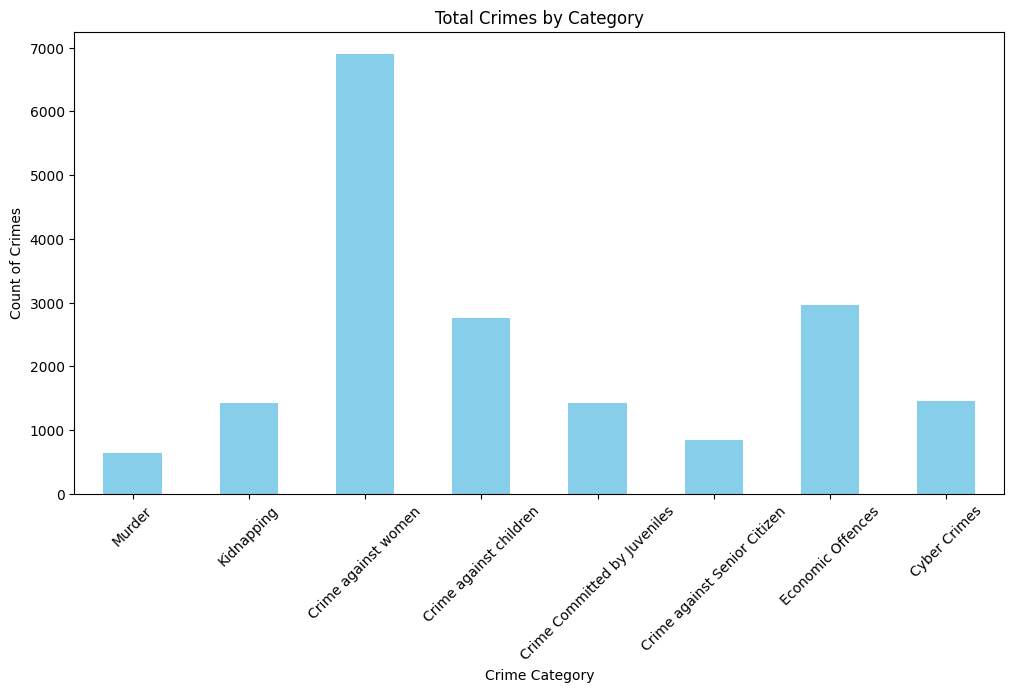

In [48]:
# Stacked Bar Chart of Crime Categories
crime_categories = ['Murder', 'Kidnapping', 'Crime against women', 'Crime against children', 
                    'Crime Committed by Juveniles', 'Crime against Senior Citizen', 
                    'Economic Offences', 'Cyber Crimes']

# Calculate total crimes per category
crime_data = new_synthetic_data[crime_categories].sum()

# Visualization
plt.figure(figsize=(12, 6))
crime_data.plot(kind='bar', color='skyblue')
plt.title('Total Crimes by Category')
plt.ylabel('Count of Crimes')
plt.xlabel('Crime Category')
plt.xticks(rotation=45)
plt.show()


 Why:
 - This scatter plot helps understand the relationship between population size and crime rate.
 
 Insight:
 - Cities with larger populations often show higher crime rates, emphasizing the need for targeted measures in urban areas.


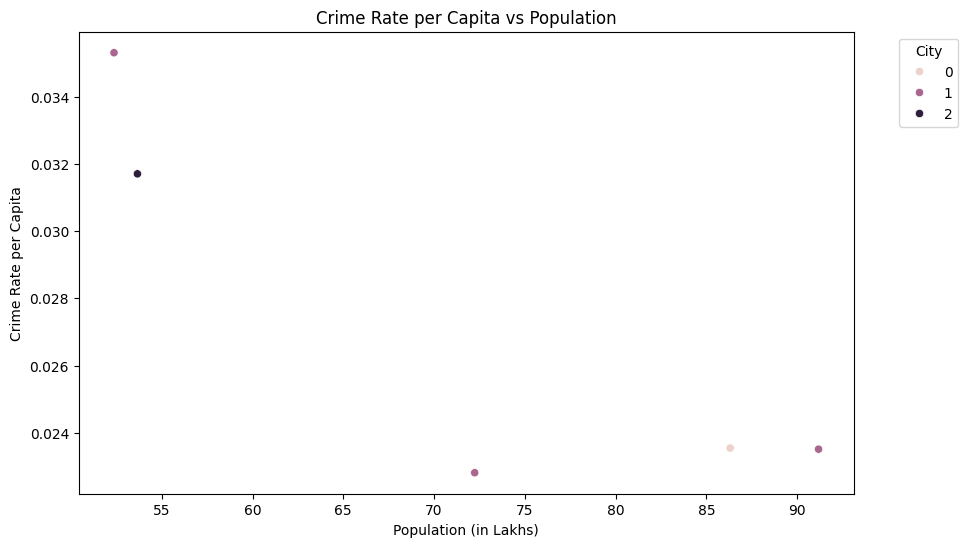

In [49]:
# Calculate crime rate per capita
new_synthetic_data['Crime Rate per Capita'] = new_synthetic_data['Predicted Crime Rate'] / new_synthetic_data['Population (in Lakhs) (2011)+']

# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population (in Lakhs) (2011)+', y='Crime Rate per Capita', hue='City', data=new_synthetic_data)
plt.title('Crime Rate per Capita vs Population')
plt.ylabel('Crime Rate per Capita')
plt.xlabel('Population (in Lakhs)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [50]:
# Simulating population growth
simulated_data = new_synthetic_data.copy()  # Create a copy of the original dataset
simulated_data['Population (in Lakhs) (2011)+'] *= 1.10  # Increase population by 10%


 Why:
 - Population growth is a key factor influencing crime rates.
 - This simulation increases the population by 10% to evaluate how crime rates might change in response.

In [51]:

# Predict future crime rates
simulated_x = simulated_data[['Year', 'City', 'Population (in Lakhs) (2011)+', 'Murder']].values
simulated_predictions = model.predict(simulated_x)

# Add simulated predictions to the dataset
simulated_data['Simulated Predicted Crime Rate'] = simulated_predictions



 Why:
 - This step compares the model's predictions for current and future population scenarios.
 - Simulated crime rates allow policymakers to anticipate and plan for crime under population growth scenarios.

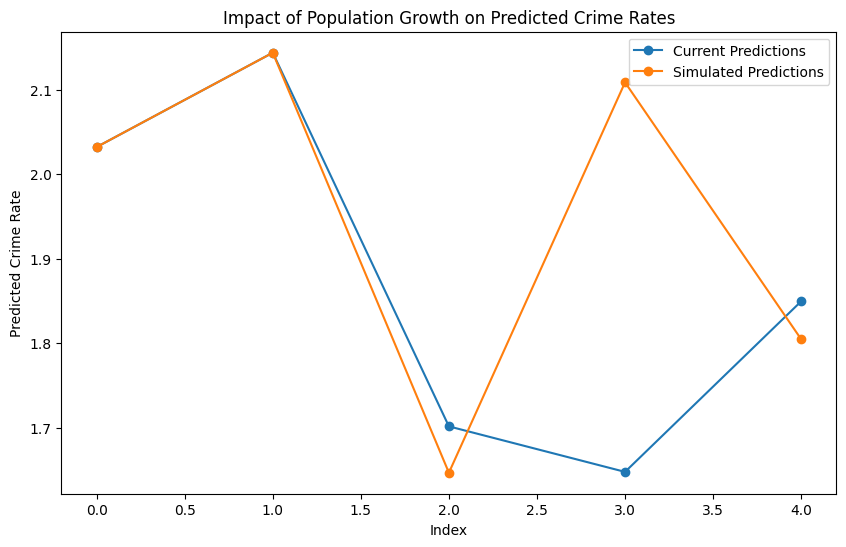

In [52]:

# Compare actual vs simulated
plt.figure(figsize=(10, 6))
plt.plot(new_synthetic_data['Predicted Crime Rate'], label='Current Predictions', marker='o')
plt.plot(simulated_data['Simulated Predicted Crime Rate'], label='Simulated Predictions', marker='o')
plt.title('Impact of Population Growth on Predicted Crime Rates')
plt.ylabel('Predicted Crime Rate')
plt.xlabel('Index')
plt.legend()
plt.show()

Why:
 - The plot visually compares current crime predictions with simulated crime rates.
 - It helps identify the effect of population growth on crime.